**Описание проекта:**

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных. Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет.Задача — провести анализ и подготовить план действий по удержанию клиентов.

## Загрузка данных

In [1]:
conda install -c conda-forge imbalanced-learn

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.2
  latest version: 22.9.0

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.9.24  |       ha878542_0         150 KB  conda-forge
    certifi-2022.9.24          |     pyhd8ed1ab_0         155 KB  conda-forge
    imbalanced-learn-0.7.0     |             py_1          97 KB  conda-forge
    joblib-1.2.0               |     pyhd8ed1ab_0         205 KB  conda-forge
    scikit-learn-0.24.2        |   py39h4dfa638_0         7.6 MB  conda-forge
    scipy-1.6.3                |   py39hee8e79c_0        20.7 MB  conda-forge
    threadpoolctl-3.1.0        |     pyh8a188c0_0          18 KB  conda-forge
    --

In [2]:
import imblearn

In [3]:
#загружаем библиотеки
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from itertools import combinations
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.metrics import silhouette_score
import sklearn
from sklearn.metrics import classification_report
from imblearn.under_sampling import NearMiss

import numpy as np
import warnings
import re 
warnings.filterwarnings("ignore")

In [4]:
#загружаем файл
data = pd.read_csv('/datasets/gym_churn.csv')

## EDA - исследовательский анализ данных

### Анализ качества признаков

In [5]:
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Пока не понятна полная картина информации. Но мы знаем значения всех колонок. Данные клиента за предыдущий до проверки факта оттока месяц:
- 'gender' — пол;
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- 'Phone' — наличие контактного телефона;
- 'Age' — возраст;
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).


Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
- 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
- 'Group_visits' — факт посещения групповых занятий;
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
- 'Churn' — факт оттока в текущем месяце.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [7]:
data.shape

(4000, 14)

- В нашем датасете есть 4000 строк, 14 столбцов, нет пропусков. Два типа данных (`int`и `float`). Все признаки у нас численные, тип данных подходит. Переменных, имеющих временную структуру, несколько:  'Lifetime', 'Contract_period', 'Month_to_end_contract'. 

In [8]:
#приведем все названия к нижнему регистру
data.columns = data.columns.str.lower()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

In [9]:
#убедимся, что пропусков нет
data.isna().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

In [10]:
#проверим полные дубликаты
data.duplicated().sum()

0

In [11]:
#посмотрим средние значения и стандартные отклонения
data.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


_____

#### Cредние значения признаков в двух группах

- **Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался**

In [12]:
churn = data.groupby('churn').mean()
churn

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


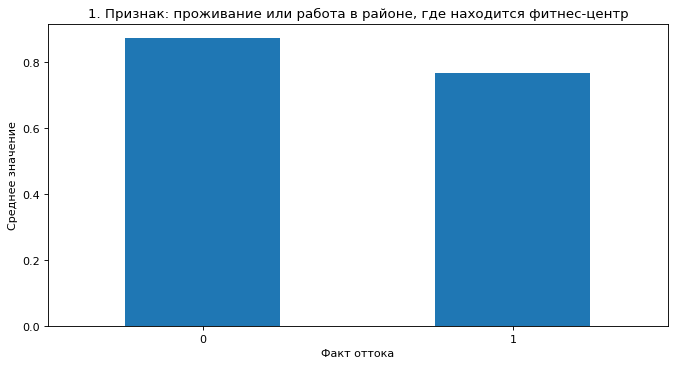

In [13]:
#построим столбчатые гистограммы по каждому признаку
plt.figure(figsize=(10,5))
churn['near_location'].plot(kind='bar')
plt.gcf().set_dpi(80)

old_ticks, old_labels = plt.xticks()
plt.xticks(old_ticks, ['\n'.join(label.get_text().split()) for label in old_labels], rotation=0)

plt.ylabel('Среднее значение')
plt.xlabel('Факт оттока')
plt.title('1. Признак: проживание или работа в районе, где находится фитнес-центр')
plt.show()

**Признак: проживание или работа в районе, где находится фитнес-центр** - клиенты, оказавшиеся в числе оттока, в большей степени не живут\работают рядом с фитнесом, что и влияет на их не посещение центра. 

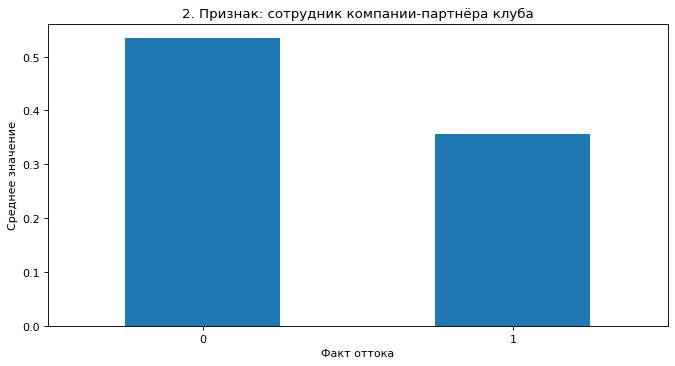

In [14]:
plt.figure(figsize=(10,5))
churn['partner'].plot(kind='bar')
plt.gcf().set_dpi(80)

old_ticks, old_labels = plt.xticks()
plt.xticks(old_ticks, ['\n'.join(label.get_text().split()) for label in old_labels], rotation=0)

plt.ylabel('Среднее значение')
plt.xlabel('Факт оттока')
plt.title('2. Признак: сотрудник компании-партнёра клуба')
plt.show()

**Признак: сотрудник компании-партнёра клуба** - клиенты, имеющие скидки за счет парнерства, реже попадают в отток

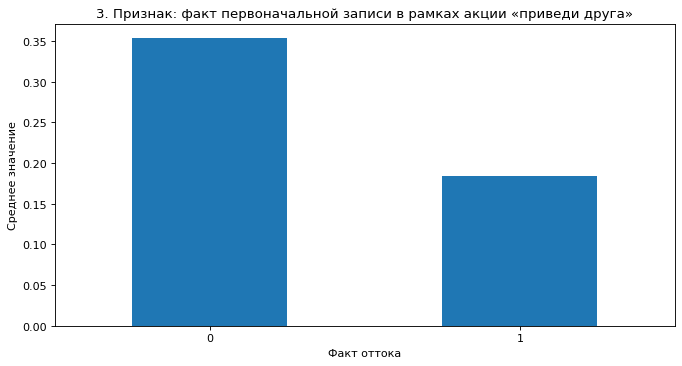

In [15]:
plt.figure(figsize=(10,5))
churn['promo_friends'].plot(kind='bar')
plt.gcf().set_dpi(80)

old_ticks, old_labels = plt.xticks()
plt.xticks(old_ticks, ['\n'.join(label.get_text().split()) for label in old_labels], rotation=0)

plt.ylabel('Среднее значение')
plt.xlabel('Факт оттока')
plt.title('3. Признак: факт первоначальной записи в рамках акции «приведи друга»')
plt.show()

**Признак: факт первоначальной записи в рамках акции «приведи друга»** - большинство те, кто не участвовал в этой акции, попали в отток

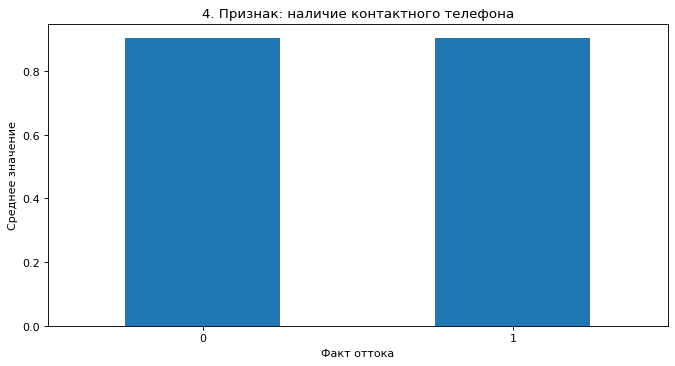

In [16]:
plt.figure(figsize=(10,5))
churn['phone'].plot(kind='bar')
plt.gcf().set_dpi(80)

old_ticks, old_labels = plt.xticks()
plt.xticks(old_ticks, ['\n'.join(label.get_text().split()) for label in old_labels], rotation=0)

plt.ylabel('Среднее значение')
plt.xlabel('Факт оттока')
plt.title('4. Признак: наличие контактного телефона')
plt.show()

**Признак: наличие контактного телефона** - этот признак никак не влияет на факт оттока

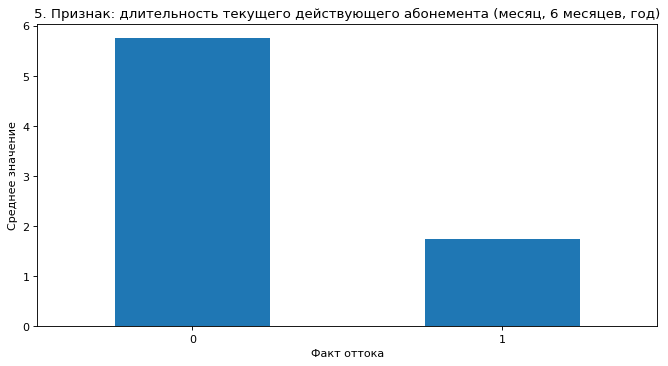

In [17]:
plt.figure(figsize=(10,5))
churn['contract_period'].plot(kind='bar')
plt.gcf().set_dpi(80)

old_ticks, old_labels = plt.xticks()
plt.xticks(old_ticks, ['\n'.join(label.get_text().split()) for label in old_labels], rotation=0)

plt.ylabel('Среднее значение')
plt.xlabel('Факт оттока')
plt.title('5. Признак: длительность текущего действующего абонемента (месяц, 6 месяцев, год)')
plt.show()

**Признак: длительность текущего действующего абонемента (месяц, 6 месяцев, год)** - в оттоке оказались те клиенты, у кого чаще встречаются абонементы на месяц

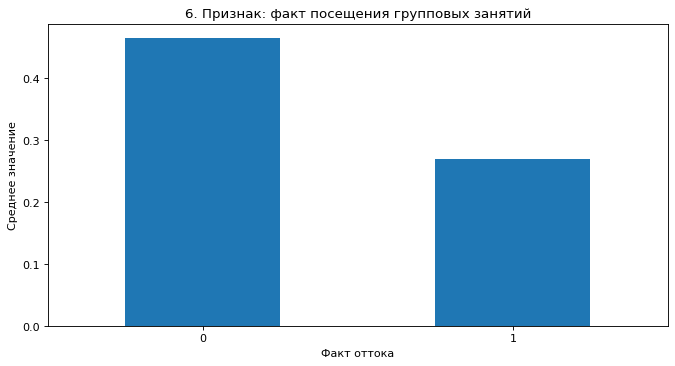

In [18]:
plt.figure(figsize=(10,5))
churn['group_visits'].plot(kind='bar')
plt.gcf().set_dpi(80)

old_ticks, old_labels = plt.xticks()
plt.xticks(old_ticks, ['\n'.join(label.get_text().split()) for label in old_labels], rotation=0)

plt.ylabel('Среднее значение')
plt.xlabel('Факт оттока')
plt.title('6. Признак: факт посещения групповых занятий')
plt.show()

**Признак: факт посещения групповых занятий** - посещают групповые занятия чаще те, кто не попал в отток. 

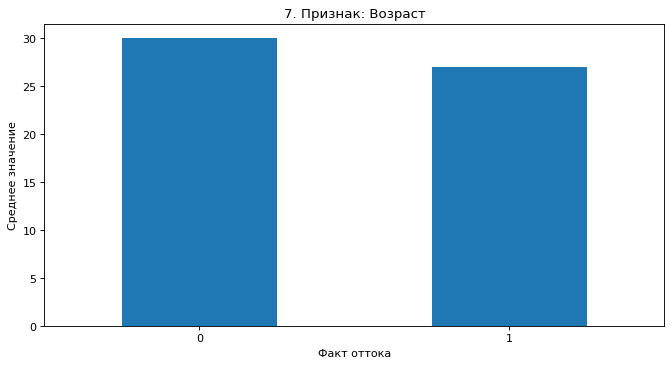

In [19]:
plt.figure(figsize=(10,5))
churn['age'].plot(kind='bar')
plt.gcf().set_dpi(80)

old_ticks, old_labels = plt.xticks()
plt.xticks(old_ticks, ['\n'.join(label.get_text().split()) for label in old_labels], rotation=0)

plt.ylabel('Среднее значение')
plt.xlabel('Факт оттока')
plt.title('7. Признак: Возраст')
plt.show()

**Признак: Возраст** - в оттоке клиенты младше, чем те, кто стабильно посещает зал. Разница не большая, думаю этот признак не сильно влияет на факт оттока

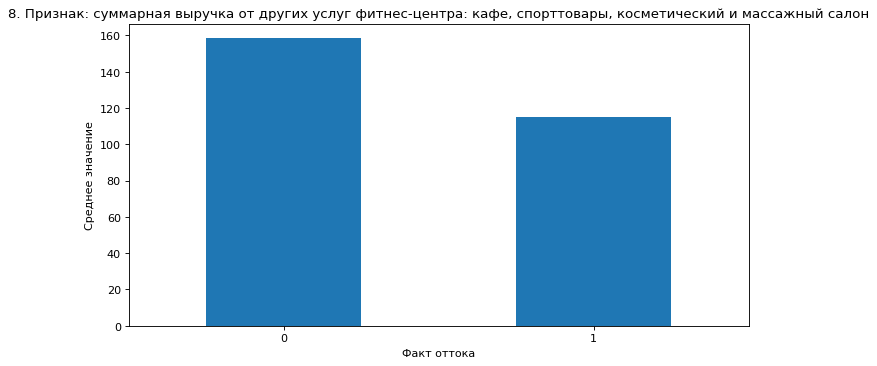

In [20]:
plt.figure(figsize=(10,5))
churn['avg_additional_charges_total'].plot(kind='bar')
plt.gcf().set_dpi(80)

old_ticks, old_labels = plt.xticks()
plt.xticks(old_ticks, ['\n'.join(label.get_text().split()) for label in old_labels], rotation=0)

plt.ylabel('Среднее значение')
plt.xlabel('Факт оттока')
plt.title('8. Признак: суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон')
plt.show()

**Признак: суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон** - заметно ниже у группы оттока

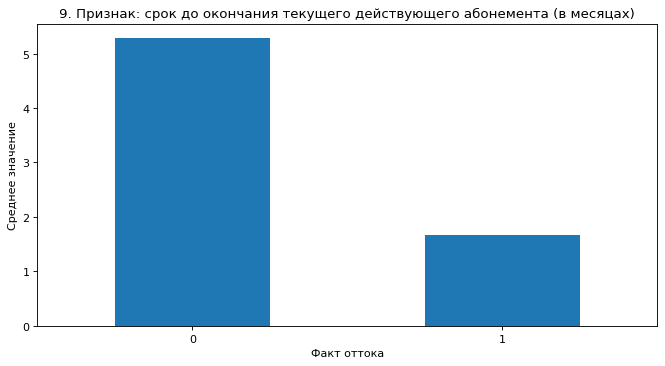

In [21]:
plt.figure(figsize=(10,5))
churn['month_to_end_contract'].plot(kind='bar')
plt.gcf().set_dpi(80)

old_ticks, old_labels = plt.xticks()
plt.xticks(old_ticks, ['\n'.join(label.get_text().split()) for label in old_labels], rotation=0)

plt.ylabel('Среднее значение')
plt.xlabel('Факт оттока')
plt.title('9. Признак: срок до окончания текущего действующего абонемента (в месяцах)')
plt.show()

**Признак: срок до окончания текущего действующего абонемента (в месяцах)** - у группы оттока абонементы почти закончились

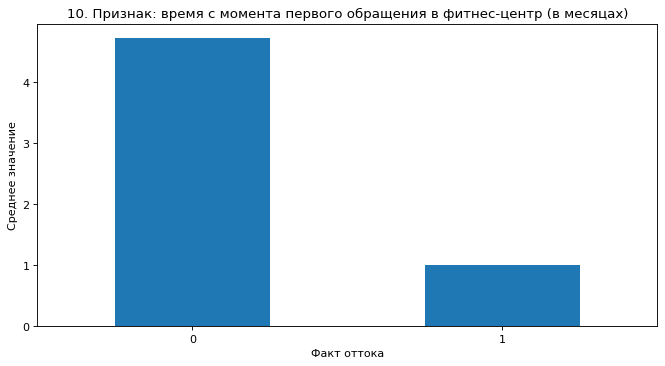

In [22]:
plt.figure(figsize=(10,5))
churn['lifetime'].plot(kind='bar')
plt.gcf().set_dpi(80)

old_ticks, old_labels = plt.xticks()
plt.xticks(old_ticks, ['\n'.join(label.get_text().split()) for label in old_labels], rotation=0)

plt.ylabel('Среднее значение')
plt.xlabel('Факт оттока')
plt.title('10. Признак: время с момента первого обращения в фитнес-центр (в месяцах)')
plt.show()

**Признак: время с момента первого обращения в фитнес-центр (в месяцах)** - в группу оттока попали те, кто обратился в центр недавно

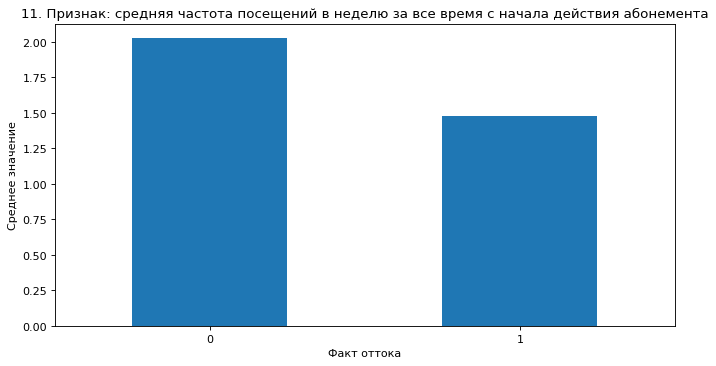

In [23]:
plt.figure(figsize=(10,5))
churn['avg_class_frequency_total'].plot(kind='bar')
plt.gcf().set_dpi(80)

old_ticks, old_labels = plt.xticks()
plt.xticks(old_ticks, ['\n'.join(label.get_text().split()) for label in old_labels], rotation=0)

plt.ylabel('Среднее значение')
plt.xlabel('Факт оттока')
plt.title('11. Признак: средняя частота посещений в неделю за все время с начала действия абонемента')
plt.show()

**Признак: средняя частота посещений в неделю за все время с начала действия абонемента** - клиенты, попавшие в отток, даже за за все время посещали фитнес реже, не чаще 1-2 раз в неделю. 

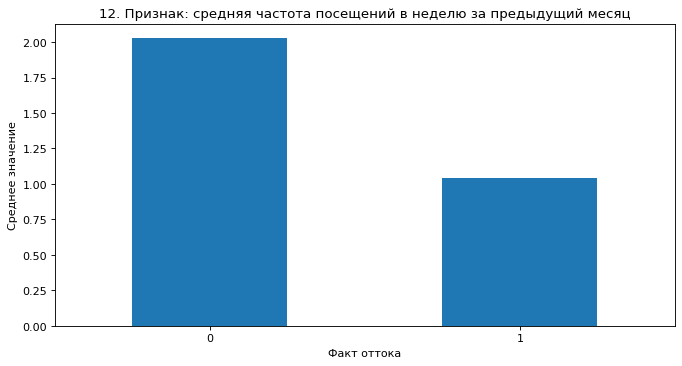

In [24]:
plt.figure(figsize=(10,5))
churn['avg_class_frequency_current_month'].plot(kind='bar')
plt.gcf().set_dpi(80)

old_ticks, old_labels = plt.xticks()
plt.xticks(old_ticks, ['\n'.join(label.get_text().split()) for label in old_labels], rotation=0)

plt.ylabel('Среднее значение')
plt.xlabel('Факт оттока')
plt.title('12. Признак: средняя частота посещений в неделю за предыдущий месяц')
plt.show()

**Признак: средняя частота посещений в неделю за предыдущий месяц** - за последний месяц, клиенты из группы оттока посещали раз в неделю фитнес

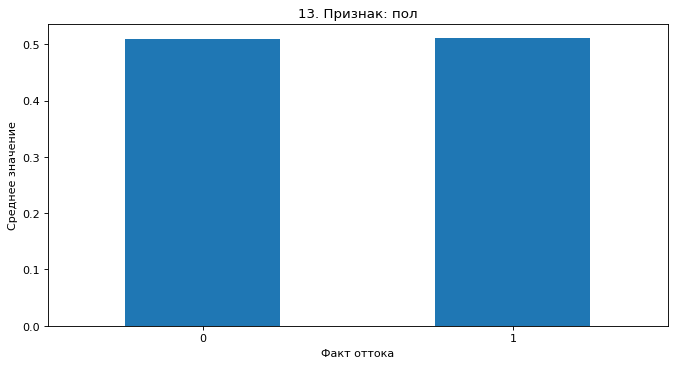

In [25]:
plt.figure(figsize=(10,5))
churn['gender'].plot(kind='bar')
plt.gcf().set_dpi(80)

old_ticks, old_labels = plt.xticks()
plt.xticks(old_ticks, ['\n'.join(label.get_text().split()) for label in old_labels], rotation=0)

plt.ylabel('Среднее значение')
plt.xlabel('Факт оттока')
plt.title('13. Признак: пол')
plt.show()

**Признак: пол** - это никак не влияет на факт оттока. Всех поровну

_____

#### Матрица корреляции

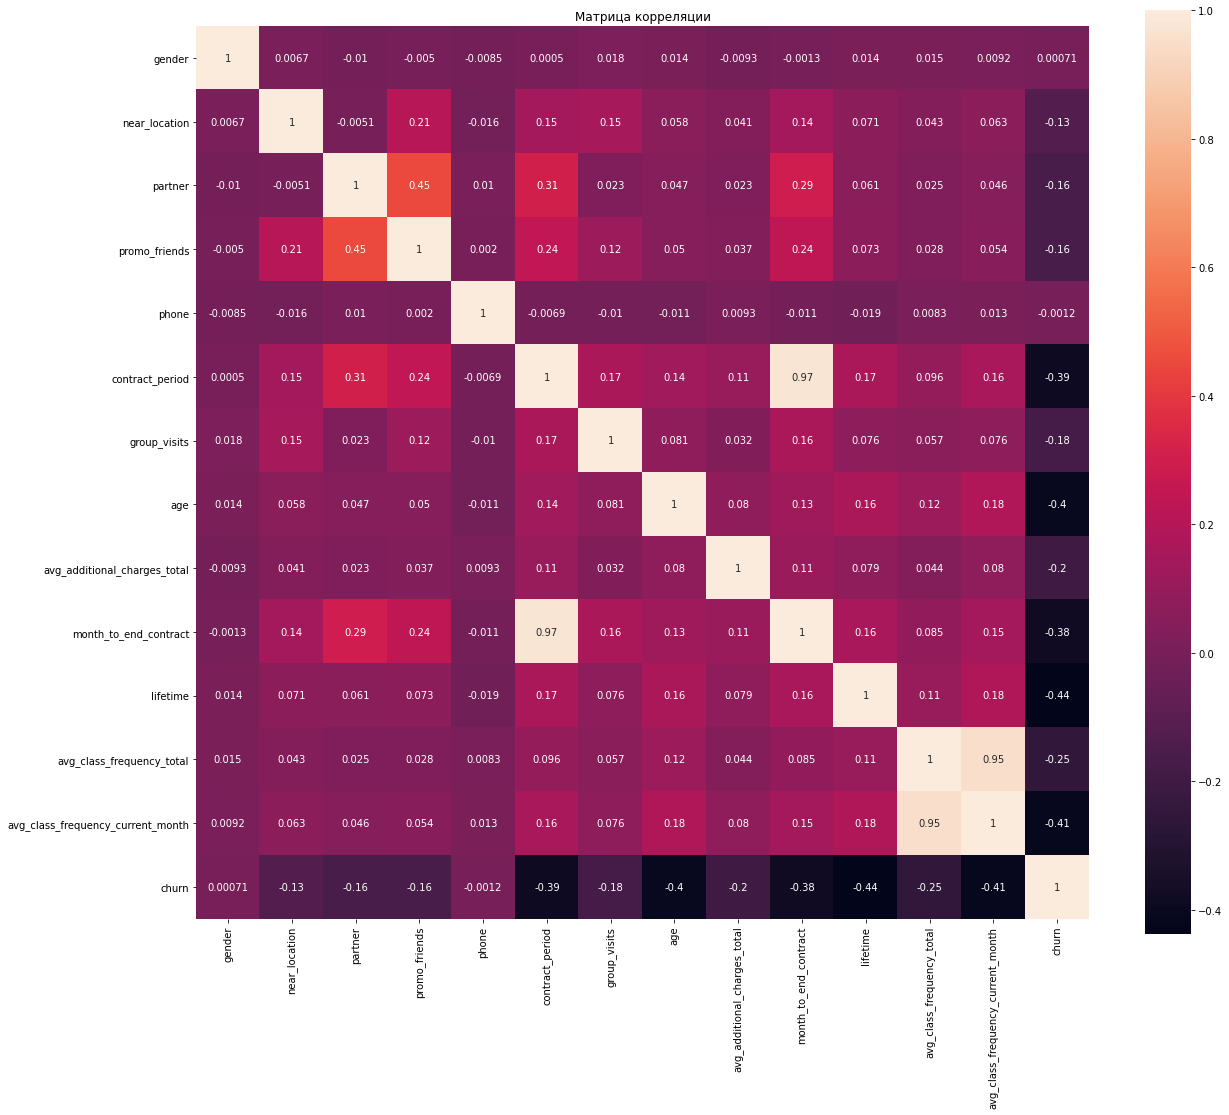

In [26]:
#построим и отрисуем матрицу корреляций
cm = data.corr() 

plt.figure(figsize=(20,17))
sns.heatmap(cm, annot=True, square=True)

#old_ticks, old_labels = plt.xticks()
#plt.xticks(old_ticks, ['\n'.join(label.get_text().split()) for label in old_labels], rotation=0)
#подписи в перевернутом виде нечитабельны

plt.title('Матрица корреляции')
plt.show()


- Есть несколько признаков, пересечение которых, влияют друг на друга заметно больше остальных. Но в целом матрица распределена равномерно. 

In [28]:
#разделим признаки на бинарные и небинарные
binar = data[['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits']]
binar.head()

,gender,near_location,partner,promo_friends,phone,group_visits
0,1,1,1,1,0,1
1,0,1,0,0,1,1
2,0,1,1,0,1,0
3,0,1,1,1,1,1
4,1,1,1,1,1,0


In [29]:
nobinar = data[['contract_period', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']]
nobinar.head()

,contract_period,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
0,6,29,14.227470,5.0,3,0.020398,0.000000
1,12,31,113.202938,12.0,7,1.922936,1.910244
2,1,28,129.448479,1.0,2,1.859098,1.736502
3,12,33,62.669863,12.0,2,3.205633,3.357215
4,1,26,198.362265,1.0,3,1.113884,1.120078


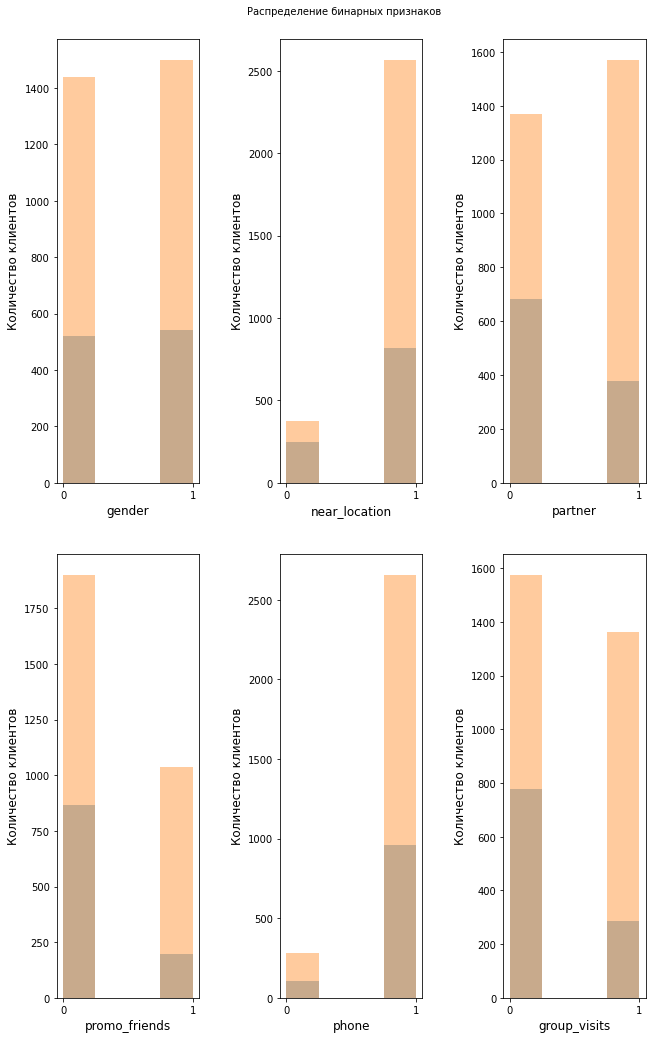

In [30]:
#распределение бинарных признаков
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10,15))
axes_list = [item for sublist in axes for item in sublist]
fig.tight_layout(pad=5.0)
fig.suptitle('Распределение бинарных признаков', fontsize=10)
for b in binar:
    ax = axes_list.pop(0)
    sns.distplot(data.query('churn == 1')[b].astype(int), bins=4, ax=ax, kde=False)
    sns.distplot(data.query('churn == 0')[b].astype(int), bins=4, ax=ax, kde=False)
    ax.set_xticks([0,1])
    ax.set_xlabel(b, fontsize=12)
    ax.set_ylabel('Количество клиентов', fontsize=12)
    

На графиках значение 0 - нет, 1 - да. Цветное распределение - это распределение по оттоку (розовый - остались, коричневый - ушли). 

- gender - мужчин больше, чем женщин. Правда доли оттока у них одинаковые
- near_location - все клиенты, кто живет ближе намного больше больше и их доля оставшихся тоже больше
- partner - те кто пришел от компаний-партнеров, продолжают ходить в фитнес центр
- promo_friends - по акции клиентов меньше, но зато доля оставшихся среди них значительно больше
- phone - большинство клиентов оставили свой телефон
- group_visits - почти все, кто ходит на групповые занятия остались

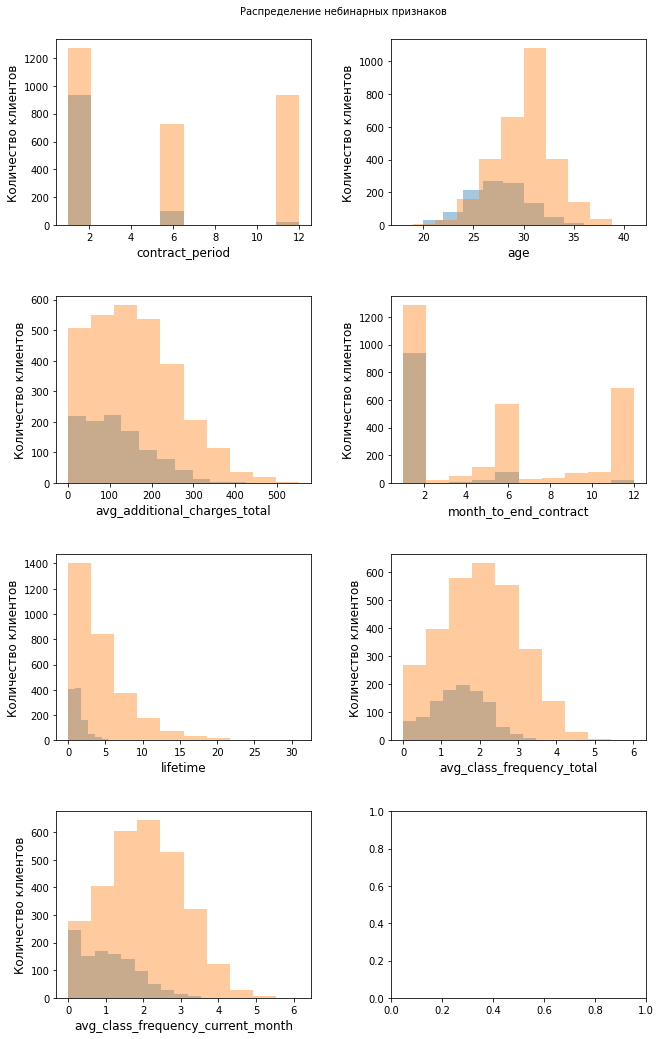

In [31]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,15))
axes_list = [item for sublist in axes for item in sublist]
fig.tight_layout(pad=5.0)
fig.suptitle('Распределение небинарных признаков', fontsize=10)
for d in nobinar:
    ax = axes_list.pop(0)
    sns.distplot(data.query('churn == 1')[d], bins=10, ax=ax, kde=False)
    sns.distplot(data.query('churn == 0')[d], bins=10, ax=ax, kde=False)
    ax.set_xlabel(d, fontsize=12)
    ax.set_ylabel('Количество клиентов', fontsize=12)


Цвета: розовый - остались, коричневый(он же голубой) - ушли.

- contract_period -  отток клиентов с годовым абонементом меньше. Те у кого месячный абонемент, почти все ушли

- age - клиенты до 30 уходят чаще

- avg_additional_charges_total - нет четкой зависимости кто ушел, но вот плятят много в основном те, кто остался

- month_to_end_contract - основной отток идет среди тех у кого осталься 1 месяц

- lifetime - основной отток среди тех, кто ходил до 2 месяцев

- avg_class_frequency_total - маловероятный отток среди тех клиентов, если они ходят 3 раза и более 

- avg_class_frequency_current_month - чем чаще клиент ходил в фитнес за последний месяц, тем и отток меньше

- Явных выбросов или перекосов на диаграммах рассеивания не видно. Значит на этих данных можно строить модель

In [32]:
data['churn'].value_counts(normalize=True)

0    0.73475
1    0.26525
Name: churn, dtype: float64

**Вывод 2 шага:**

- Всего записей в таблице 4000 и 14 признаков.
- Данные без пропусков и дубликатов, выбросов так же нет
- Построили столбчатые гистограммы по каждому признаку относительно факта оттока
- Все признаки имеют отрицательную корреляцию с целевой переменной `churn` (то есть - чем сильнее признак, тем слабее отток клиентов)
- Есть несколько признаков, пересечение которых, влияют друг на друга заметно больше остальных. Но в целом матрица распределена равномерно. 
- Явных выбросов или перекосов на диаграммах рассеивания не видно. Значит на этих данных можно строить модель

______

## Модель прогнозирования оттока клиентов

**Что будем делать:** Строить модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:
- Разделим данные на обучающую и валидационную выборку
- Обучим модель на train-выборке двумя способами: логистической регрессией и случайным лесом.
- Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравним по ним модели.

In [33]:
#разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = data.drop('churn', axis=1)
y = data['churn']

In [34]:
#разделяем модель на обучающую и валидационную выборки (80\20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
#создадим объект класса StandardScaler и применим его к обучающей выборке
scaler = StandardScaler()

#обучаем scaler и одновременно трансформируем матрицу для обучающей выборки
X_train_st = scaler.fit_transform(X_train) 
print(X_train_st[:5])

#применяем стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test)


[[ 0.96922337  0.42828957 -0.97774752 -0.66001618  0.33101366  0.28547433
  -0.84551652 -0.6751115   0.55774211  0.39229432 -0.73247135 -1.39319368
  -0.99042717]
 [ 0.96922337  0.42828957  1.02275892  1.51511438  0.33101366  1.60463372
  -0.84551652  2.41995556  1.9436112   1.82071285  0.58997749 -0.28702977
  -0.05884851]
 [ 0.96922337  0.42828957  1.02275892 -0.66001618  0.33101366  0.28547433
  -0.84551652 -0.98461821  1.30953728  0.39229432 -0.73247135 -0.18044928
   0.24615351]
 [-1.03175391  0.42828957 -0.97774752  1.51511438  0.33101366 -0.81382515
  -0.84551652  0.87242203 -0.19535012 -0.79805446 -0.73247135  1.23546122
   1.35850659]
 [ 0.96922337  0.42828957  1.02275892 -0.66001618  0.33101366 -0.81382515
  -0.84551652  0.87242203  0.05174628 -0.79805446 -0.20349182  1.27672464
   1.25869033]]


### Логистическая регрессия

In [36]:
# задаем модель логистической регрессии
model = LogisticRegression(class_weight='balanced', solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)[:, 1]

- Оценим метриками - Доля правильных ответов (англ. accuracy), Точность (англ. precision) и полнота (англ. recall)


In [37]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))

Accuracy: 0.90
Precision: 0.75
Recall: 0.97
F1: 0.85


- Правильно прогнозируем более 90% ответов. Точность - 91%, а полнота 83%. 

- Так как precision и recall направлены на избежание противоположных рисков, нужна сводная метрика, учитывающая баланс между метриками. Это F1-score. Чем ближе к 1, тем лучше)

Проверим другую модель

### Случайный лес

In [38]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(class_weight='balanced', n_estimators = 100, random_state=0) 

# обучим модель случайного леса
rf_model.fit(X_train, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test) 
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]

# выведем все метрики
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, rf_predictions)))

Accuracy: 0.92
Precision: 0.86
Recall: 0.84
F1: 0.85


- Результат почти одинаковый, разве что Recall немного хуже

### Сравнение

Так как все модели и метрики работают, предлагаю все это объеденить в функцию и сделать удобный вариант для сравнения

In [39]:
# определим функцию, которая будет выводить наши метрики
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))


In [40]:
print_all_metrics(
    y_test,
    predictions,
    probabilities,
    title='Метрики для модели логистической регрессии:',
)


print_all_metrics(
    y_test,
    rf_predictions,
    rf_probabilities, 
    title='Метрики для модели случайного леса:'
)


Метрики для модели логистической регрессии:
	Accuracy: 0.90
	Precision: 0.75
	Recall: 0.97
	F1: 0.85
	ROC_AUC: 0.98
Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.86
	Recall: 0.84
	F1: 0.85
	ROC_AUC: 0.97


Добавили метрику ROC_AUC - она содержит в себе максимальное количество информации по качеству модели. Показатели метрик у нас одинаковые, но логистическая регрессия немного выигрывает

**Вывод 3 шага:**

- По параметру Accuracy "Логистическая регрессия" немного выигрывает у "Случайный лес" (0,94 против 0,92)
- По параметру Precision тоже "Логистическая регрессия" лучше (0,95 проитив 0,91)
- По параметру Recall снова выигрывает "Логистическая регрессия" (0,82 против 0,78)
- По параметру F1 "Логистическая регрессия" тоже опережает "Случайный лес" (0,88 против 0,84)
- По параметру ROC_AUC "Логистическая регрессия" и "Случайный лес" почти равны (0,98 против 0,97)
- Показатели метрик у моделей почти одинаковые, но "Логистическая регрессия" немного выигрывает
- У моделей очень высокий показатели

_____

#### Передискредитированная модель

**Предлагаю рассмотреть еще один вариант модели, сравнить текущую с передискредитированной**

In [41]:
data.shape

(4000, 14)

In [42]:
data['churn'].value_counts()

0    2939
1    1061
Name: churn, dtype: int64

In [43]:
#посмотрим размер выборок
y_1 = data['churn']
X_1 = data.drop('churn', axis = 1)
feature_names = X_1.columns
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X_1, y_1, test_size = 0.2, random_state = 0)

print('Размерность набора данных X_train: ', X1_train.shape)
print('Размерность набора данных Y_train: ', Y1_train.shape)
print('Размерность набора данных X_test: ', X1_test.shape)
print('Размерность набора данных Y_test: ', Y1_test.shape)

Размерность набора данных X_train:  (3200, 13)
Размерность набора данных Y_train:  (3200,)
Размерность набора данных X_test:  (800, 13)
Размерность набора данных Y_test:  (800,)


In [44]:
#посмотрим метрики в текущем варианте
lregress1 = LogisticRegression()
lregress1.fit(X1_train, Y1_train.ravel())
prediction1 = lregress1.predict(X1_test)
print(classification_report(Y1_test, prediction1))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       602
           1       0.82      0.80      0.81       198

    accuracy                           0.91       800
   macro avg       0.88      0.87      0.87       800
weighted avg       0.91      0.91      0.91       800



In [45]:
print('Перед применением метода кол-во меток со значением True: {}'.format(sum(Y1_train == True)))
print('Перед применением метода кол-во меток со значением False: {}'.format(sum(Y1_train == False)))

Перед применением метода кол-во меток со значением True: 863
Перед применением метода кол-во меток со значением False: 2337


In [46]:
#уравняем группы
nm = NearMiss()
X1_train_miss, Y1_train_miss = nm.fit_resample(X1_train, Y1_train.ravel())

print('После применения метода кол-во меток со значением True: {}'.format(sum(Y1_train_miss == True)))
print('После применения метода кол-во меток со значением False: {}'.format(sum(Y1_train_miss == False)))

После применения метода кол-во меток со значением True: 863
После применения метода кол-во меток со значением False: 863


In [47]:
#сравним новые метрики
lregress2 = LogisticRegression()
lregress2.fit(X1_train_miss, Y1_train_miss.ravel())
prediction2 = lregress2.predict(X1_test)

print(classification_report(Y1_test, prediction1))
print(classification_report(Y1_test, prediction2))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       602
           1       0.82      0.80      0.81       198

    accuracy                           0.91       800
   macro avg       0.88      0.87      0.87       800
weighted avg       0.91      0.91      0.91       800

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       602
           1       0.80      0.81      0.80       198

    accuracy                           0.90       800
   macro avg       0.87      0.87      0.87       800
weighted avg       0.90      0.90      0.90       800



Значение меньшинства повысилось до 82%. Но из-за того, что выборка большего класса значительно уменьшилась, понизилась точность модели на 1%. Таким образом, этот метод помог справиться с несбалансированностью классов, но не сильно повлиял на результат. В целом считаю, что можно воспользоваться первоначальным вариантом

_____

#### Бинарная модель

In [48]:
#разделим наши данные на признаки (матрица X) и целевую переменную (y)
X_b = binar
y_b = data['churn']

In [49]:
#разделяем модель на обучающую и валидационную выборки (80\20)
Xb_train, Xb_test, yb_train, yb_test = train_test_split(X_b, y_b, test_size=0.2)

In [50]:
#создадим объект класса StandardScaler и применим его к обучающей выборке
scaler_b = StandardScaler()

#обучаем scaler и одновременно трансформируем матрицу для обучающей выборки
Xb_train_st = scaler_b.fit_transform(Xb_train) 
print(Xb_train_st[:5])

#применяем стандартизацию к матрице признаков для тестовой выборки
Xb_test_st = scaler_b.transform(Xb_test)

[[ 0.97530483  0.42777851 -0.97104404 -0.66636576  0.32517073 -0.83361577]
 [-1.02532046  0.42777851 -0.97104404 -0.66636576  0.32517073 -0.83361577]
 [-1.02532046  0.42777851  1.02981941 -0.66636576  0.32517073 -0.83361577]
 [-1.02532046 -2.33765833  1.02981941 -0.66636576  0.32517073  1.19959343]
 [ 0.97530483  0.42777851  1.02981941 -0.66636576  0.32517073 -0.83361577]]


In [51]:
# задаем модель логистической регрессии
model = LogisticRegression(class_weight='balanced', solver='liblinear')
model.fit(Xb_train, yb_train)
predictions_b = model.predict(Xb_test)
probabilities_b = model.predict_proba(Xb_test)[:, 1]

In [52]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model_b = RandomForestClassifier(class_weight='balanced', n_estimators = 100, random_state=0) 

# обучим модель случайного леса
rf_model_b.fit(Xb_train, yb_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions_b = rf_model_b.predict(Xb_test) 
rf_probabilities_b = rf_model_b.predict_proba(Xb_test)[:, 1]

In [53]:
print_all_metrics(
    yb_test,
    predictions_b,
    probabilities_b,
    title='Метрики для бинарной модели логистической регрессии:',
)


print_all_metrics(
    yb_test,
    rf_predictions_b,
    rf_probabilities_b, 
    title='Метрики для бинарной модели случайного леса:'
)

Метрики для бинарной модели логистической регрессии:
	Accuracy: 0.62
	Precision: 0.38
	Recall: 0.50
	F1: 0.43
	ROC_AUC: 0.64
Метрики для бинарной модели случайного леса:
	Accuracy: 0.62
	Precision: 0.37
	Recall: 0.49
	F1: 0.42
	ROC_AUC: 0.61


**Вывод по бинарной модели:**

По параметру Accuracy "Логистическая регрессия" и "Случайный лес" равны
По параметру Precision "Логистическая регрессия" проигрывает (0,39 проитив 0,40)
По параметру Recall выигрывает "Логистическая регрессия" (0,54 против 0,52)
По параметру F1 "Логистическая регрессия" тоже опережает "Случайный лес" (0,46 против 0,45)
По параметру ROC_AUC "Логистическая регрессия" и "Случайный лес" почти равны (0,64 против 0,63)
Показатели метрик у моделей почти одинаковые, но "Логистическая регрессия" немного выигрывает и на этот раз
У моделей средние показатели

_____

#### Небинарная модель

In [54]:
#разделим наши данные на признаки (матрица X) и целевую переменную (y)
X_nb = nobinar
y_nb = data['churn']

In [55]:
#разделяем модель на обучающую и валидационную выборки (80\20)
Xnb_train, Xnb_test, ynb_train, ynb_test = train_test_split(X_nb, y_nb, test_size=0.2)

#создадим объект класса StandardScaler и применим его к обучающей выборке
scaler_nb = StandardScaler()

#обучаем scaler и одновременно трансформируем матрицу для обучающей выборки
Xnb_train_st = scaler_nb.fit_transform(Xnb_train) 
print(Xnb_train_st[:5])

#применяем стандартизацию к матрице признаков для тестовой выборки
Xnb_test_st = scaler_nb.transform(Xnb_test)

[[ 0.29318582 -0.06028723  0.88180757  0.16672073  0.32902117 -0.24994315
   0.00525354]
 [-0.80669065 -0.06028723 -0.12031406 -0.7893838   0.06408213  0.18170158
   0.30666642]
 [-0.80669065  0.85983585 -1.22171763 -0.7893838  -0.46579595  0.99471742
   0.96241346]
 [ 1.61303758  0.55312816  0.36997265  1.83990364 -0.46579595 -0.83190459
  -0.43975046]
 [-0.80669065 -1.9005334   0.07863208 -0.7893838  -0.99567404 -0.82073208
  -1.68512588]]


In [56]:
# задаем модель логистической регрессии
model = LogisticRegression(class_weight='balanced', solver='liblinear')
model.fit(Xnb_train, ynb_train)
predictions_nb = model.predict(Xnb_test)
probabilities_nb = model.predict_proba(Xnb_test)[:, 1]

In [57]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model_nb = RandomForestClassifier(class_weight='balanced', n_estimators = 100, random_state=0) 

# обучим модель случайного леса
rf_model_nb.fit(Xnb_train, ynb_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions_nb = rf_model_nb.predict(Xnb_test) 
rf_probabilities_nb = rf_model_nb.predict_proba(Xnb_test)[:, 1]

In [58]:
print_all_metrics(
    ynb_test,
    predictions_nb,
    probabilities_nb,
    title='Метрики для НЕбинарной модели логистической регрессии:',
)


print_all_metrics(
    ynb_test,
    rf_predictions_nb,
    rf_probabilities_nb, 
    title='Метрики для НЕбинарной модели случайного леса:'
)

Метрики для НЕбинарной модели логистической регрессии:
	Accuracy: 0.89
	Precision: 0.73
	Recall: 0.91
	F1: 0.81
	ROC_AUC: 0.97
Метрики для НЕбинарной модели случайного леса:
	Accuracy: 0.91
	Precision: 0.84
	Recall: 0.82
	F1: 0.83
	ROC_AUC: 0.97


**Вывод по НЕбинарной модели:**

- По параметру Accuracy "Логистическая регрессия" проигрывает "Случайный лес" (0,90 против 0,91) 
- По параметру Precision "Логистическая регрессия" проигрывает (0,78 проитив 0,87) 
- По параметру Recall выигрывает "Логистическая регрессия" (0,89 против 0,81) 
- По параметру F1 "Логистическая регрессия" меньше чем "Случайный лес" (0,83 против 0,84) 
- По параметру ROC_AUC "Логистическая регрессия" и "Случайный лес" равны 

Показатели метрик у моделей почти одинаковые, но "Случайный лес" немного выигрывает. У моделей высокие показатели

Это первый случай победы модели "Случайный лес", но в большинстве всех экспериментов побеждает модель "Логистическая регрессия".

____

_____

## Кластеризация клиентов

### Стандартизация данных

In [59]:
# стандартизируем данные
# создаём объект класса scaler (нормализатор)
sc = StandardScaler()

# обучаем нормализатор и преобразуем набор данных 
x_sc = sc.fit_transform(X)

In [60]:
linked = linkage(x_sc, method = 'ward')

### Матрица расстояний и дендрограмма

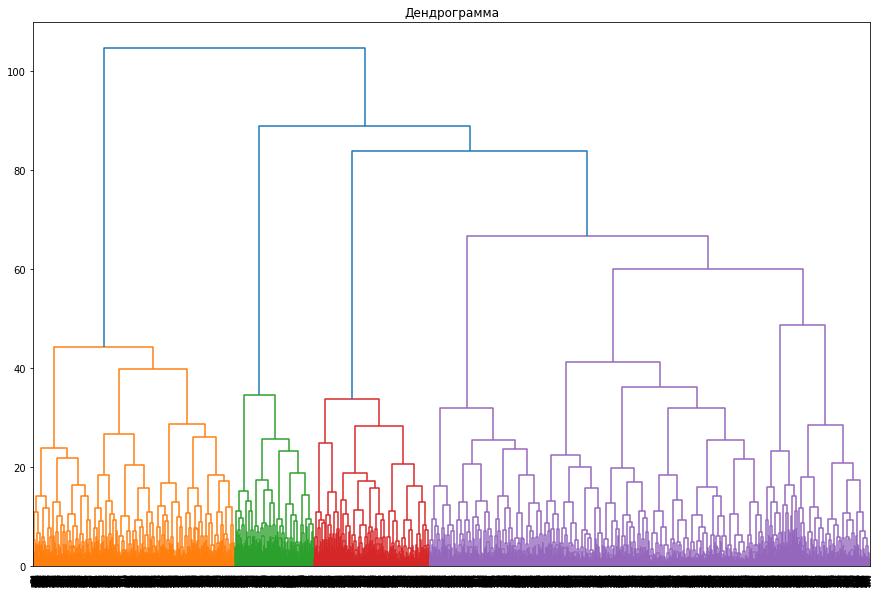

In [61]:
#В переменной linked сохранена таблица «связок» между объектами. Её можно визуализировать как дендрограмму:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Дендрограмма')
plt.show() 

### Кластеризации по алгоритму K-Means и прогноз кластеров клиентов

In [62]:
# задаём модель k_means с числом кластеров 5 и фиксируем значение random_state
km = KMeans(n_clusters=5, random_state=0)

# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 2)
labels = km.fit_predict(x_sc)

# сохраняем метки кластера в поле нашего датасета
data['cluster'] = labels

# выводим статистику по средним значениям наших признаков по кластеру
data.groupby('cluster').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,,,
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019


In [63]:
#посмторим сколько человек в каждом кластере
data.groupby(['cluster'])['gender'].count()

cluster
0    1010
1     385
2     505
3    1262
4     838
Name: gender, dtype: int64

- Самаая большая группа 3, а самая маленькая 1. Разница почти в 3,5 раза.

In [65]:
silhouette_score(x_sc, labels)

0.14140953623023353

На вход передаём нормализованную или стандартизованную матрицу признаков и метки, которые спрогнозировал алгоритм кластеризации, в виде списка.
Значение метрики силуэта принимает значения от -1 до 1. Чем ближе к 1, тем качественнее кластеризация. У нас значение `0,14`

Значение этой метрики не очень высокое, но, если вспомнить графики, там не было четко отделяемых групп на попарных графиках. Сложн найти процесс, в котором наблюдения имеют явную структуру и ярко выраженное разделение

### Средние значения признаков для каждого кластера

In [66]:
#средние значения признаков по кластерам
data.drop('churn', axis=1).groupby('cluster').mean().T

cluster,0,1,2,3,4
gender,0.502970,0.522078,0.495050,0.485737,0.559666
near_location,0.959406,0.862338,0.000000,1.000000,0.976134
partner,0.783168,0.470130,0.463366,0.350238,0.356802
promo_friends,0.574257,0.306494,0.079208,0.240095,0.230310
phone,1.000000,0.000000,1.000000,1.000000,0.998807
contract_period,10.889109,4.787013,2.352475,1.948494,2.669451
group_visits,0.542574,0.425974,0.215842,0.341521,0.473747
age,29.982178,29.301299,28.477228,28.167987,30.125298
avg_additional_charges_total,160.761016,143.957664,135.457501,131.622204,161.657905
month_to_end_contract,9.954455,4.475325,2.198020,1.856577,2.459427


**Посмотрим характерные черты, которые сразу бросаются в галаза**

**Кластер 0:**
- самая высокая доля партнерства, видимо это те самые клиенты, которые ходят в зал, частично за счет компании. 
- достаточно весомая доля клиентов, участвовавшая в акции "приведи друга"
- самые длительные абонементы и большой период до окончания действия абонементов

**Кластер 1:**
- единственная группа, которая не оставила свой номер телефона

**Кластер 2:**
- единственные, кто не находится рядом с фитнес-центром
- эти клиенты почти не участвовали в акции "приведи друга"
- те, кто меньше всего посещают групповые занятия

**Кластер 3:**
- те, кто ходят реже всех
- за последний месяц вообще раз в неделю (вороятно скоро попадут в отток)

**Кластер 4:**
- те клиенты, которые ходят чаще всех, почти 3 раза в неделю. Полная противоположность кластеру 3 

### Распределения признаков для кластеров

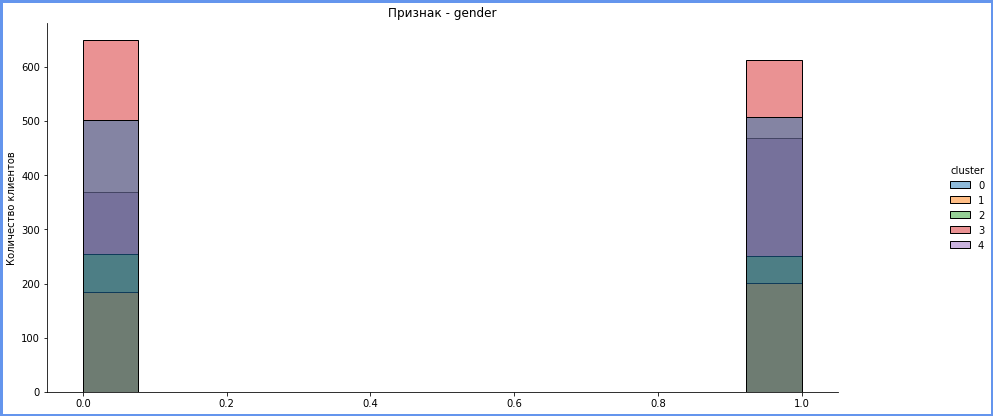

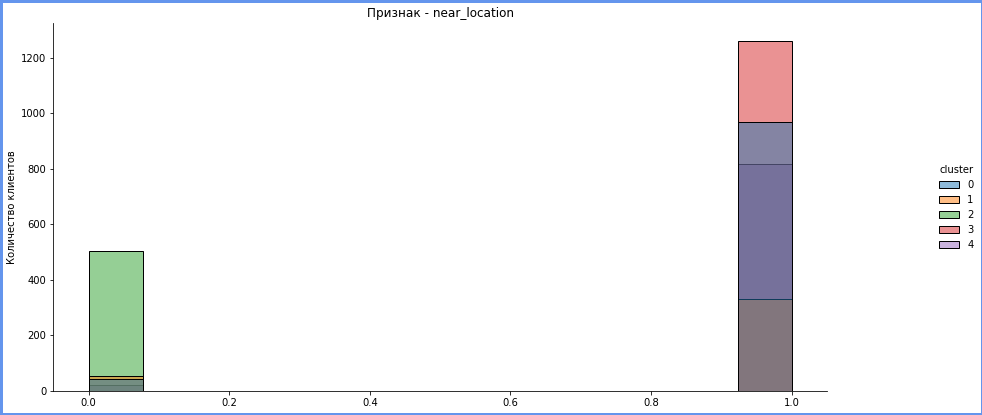

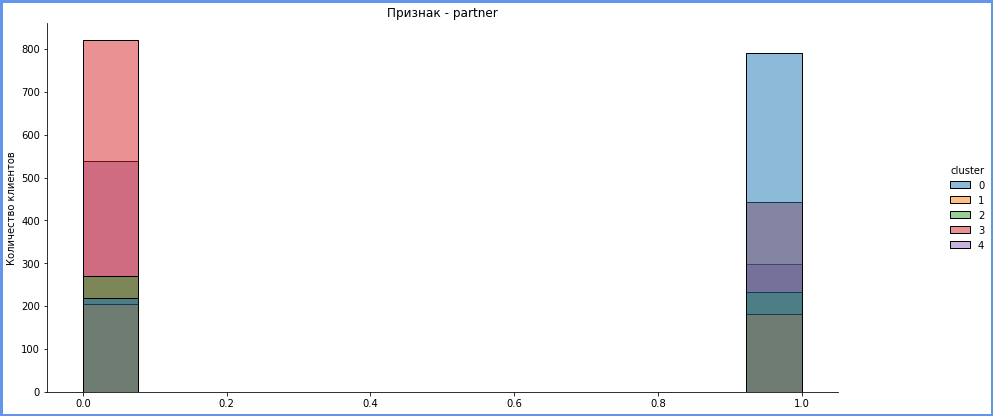

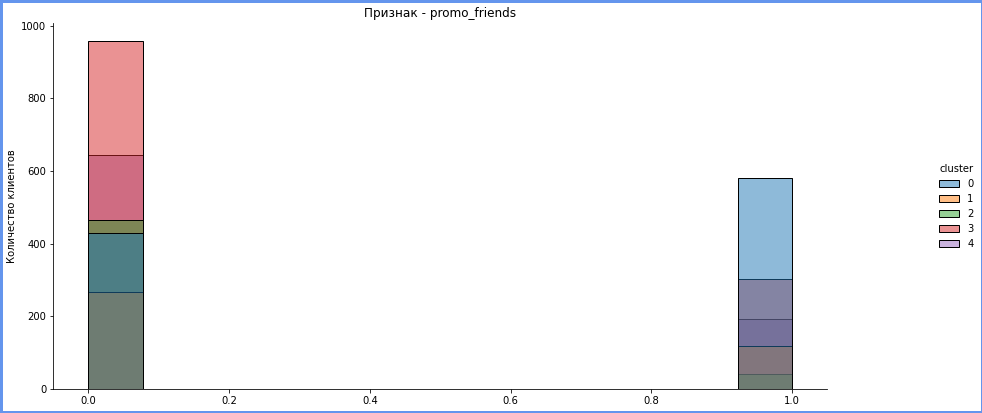

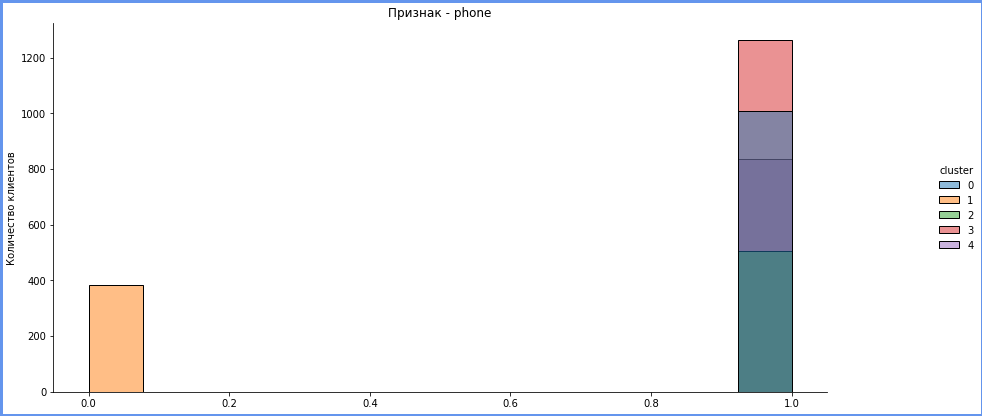

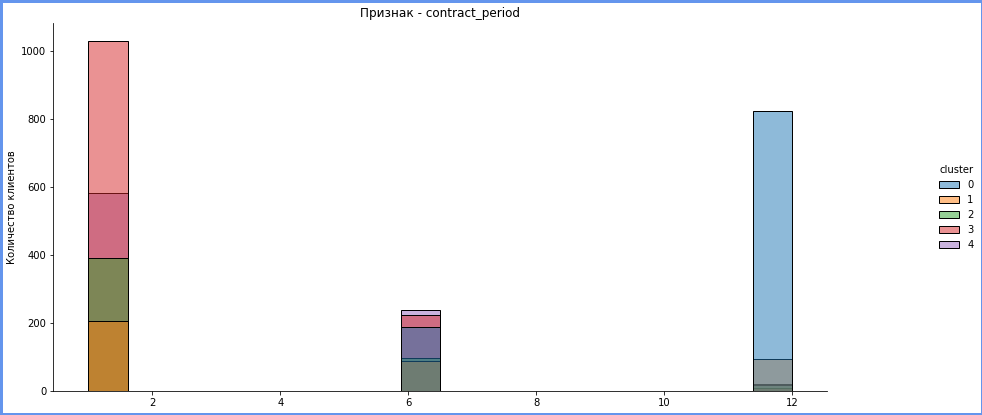

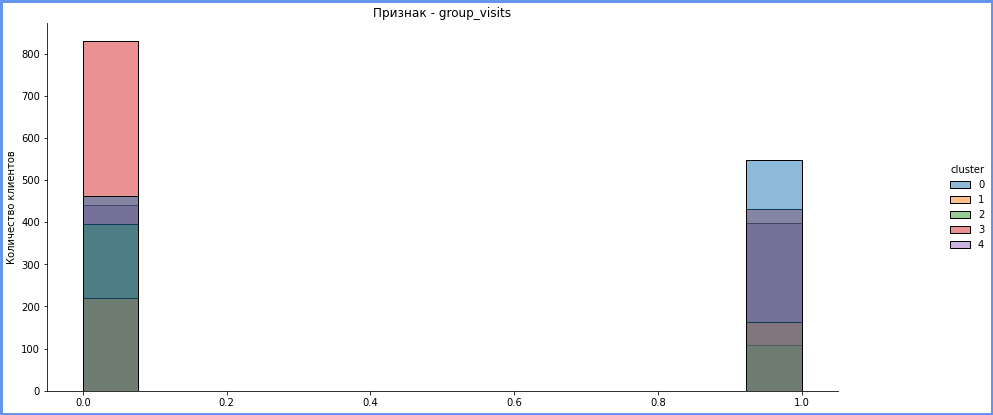

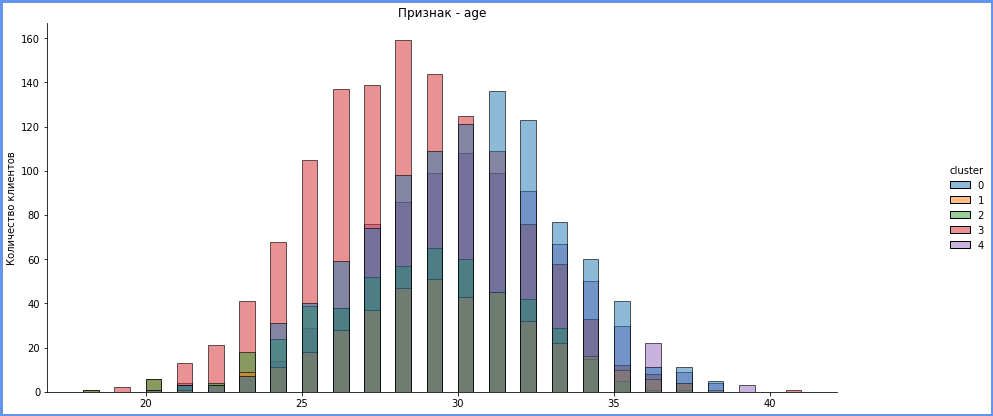

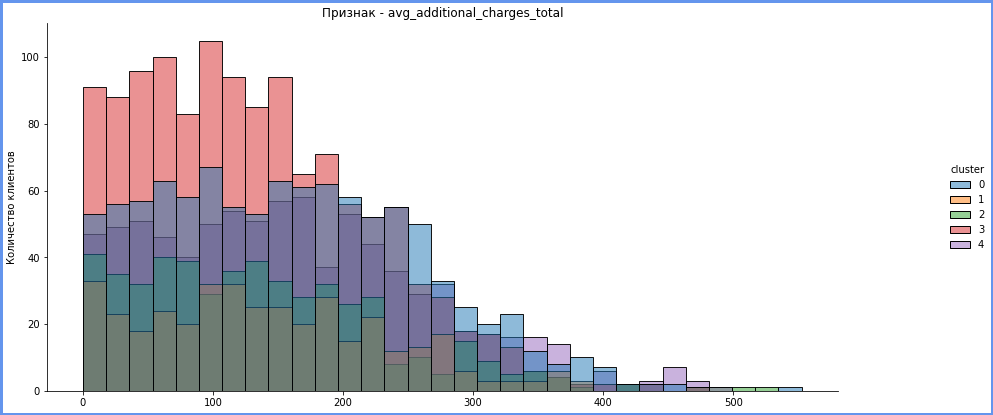

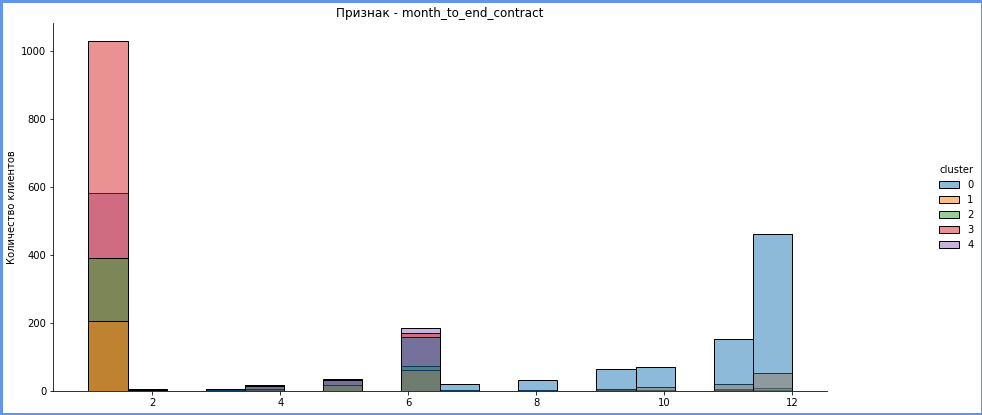

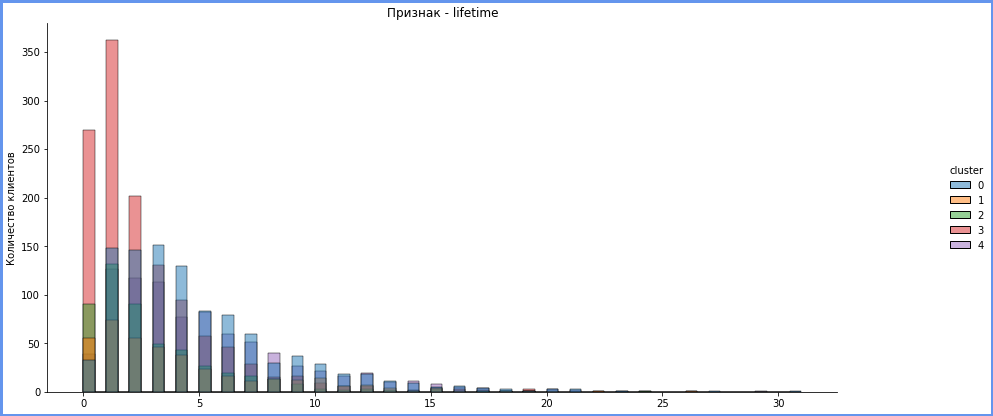

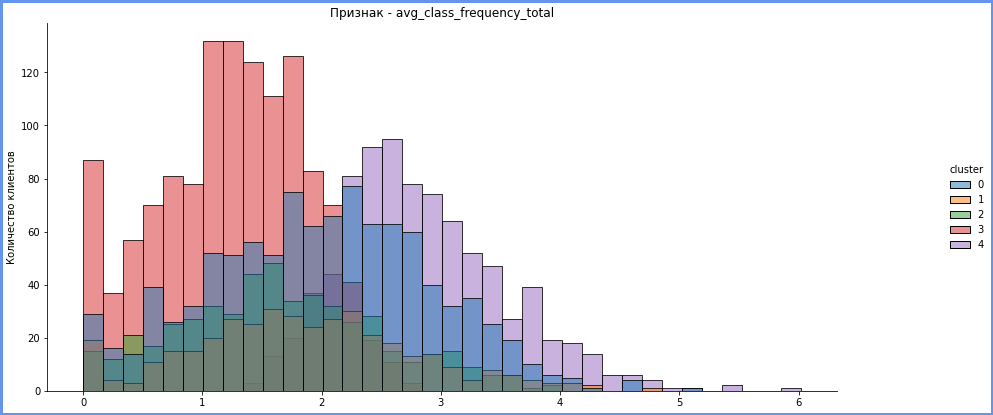

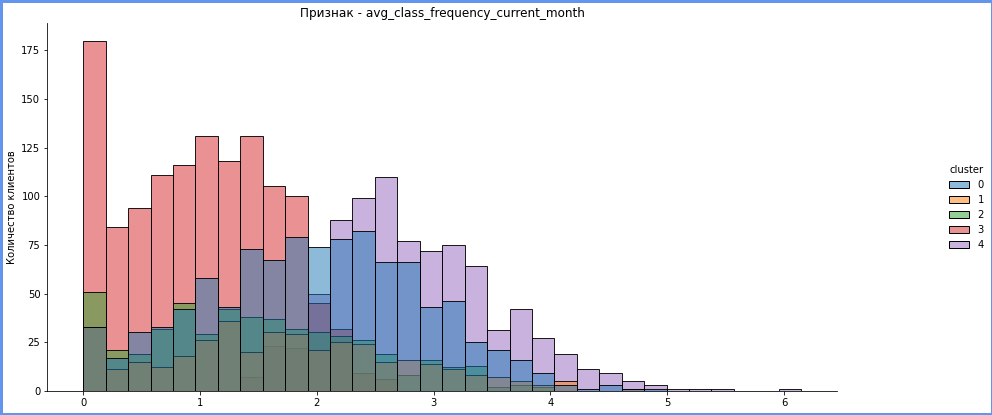

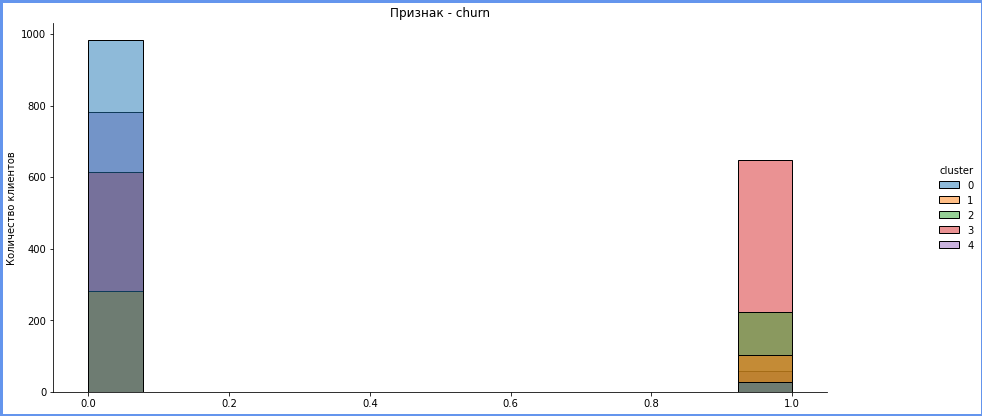

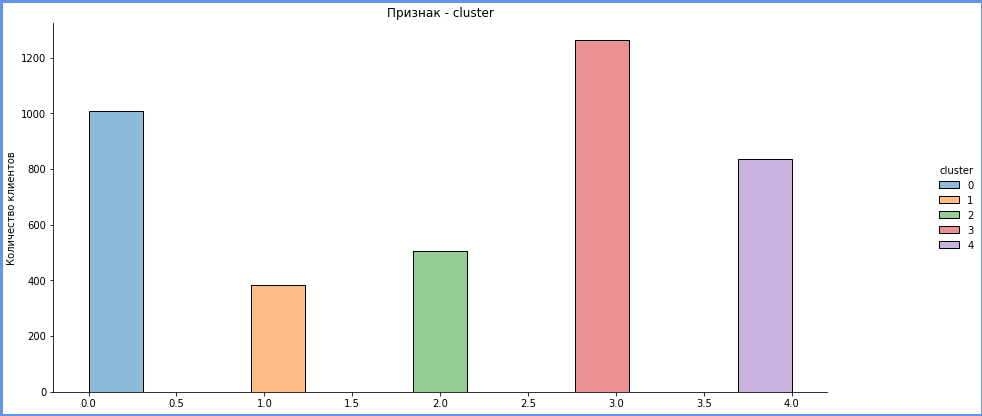

In [67]:
for i in data:
    g = sns.displot(data, x=data[i], hue='cluster', palette="tab10", kind='hist' ) 
    plt.title(f'Признак - {i}')
    plt.ylabel("Количество клиентов")
    plt.xlabel("")
    g.fig.set_figwidth(15)
    g.fig.set_figheight(6)
    g.fig.patch.set_linewidth(5)
    g.fig.patch.set_edgecolor('cornflowerblue')
    plt.show()


**Рассмотрим графики:**
1. Gender - ровное распределение
2. Near_location - кластер 2 живет совсем не близко и сильно выделяется
3. Partner -кластеры 0 является партнером
4. Promo_friends - похож на предыдущий график
5. Phone - кластер 1, кто не оставлял свой номер
6. Contract_period - в кластере 0 преимущественно годовые абонементы, и в нем нет тех у кого абонемент 1 мес.
7. Group_visits - кластер 3 не любители групповых занятий, в отличие от кластера 0
8. Age - кластер 3 выделяется на фоне остальных и преимущественно состоит из тех кому до 30 лет, а кластер 0 - кому больше 30 лет
9. Avg_additional_charges_total - снова выделяется кластер 3, который тратит меньше всех (молодые) и кластер 0 - тратят свыше 200 (и старше 30 лет). Чем старше - тем больше тратят.
10. Month_to_end_contract - здесь можно опять выделить кластер 0 - у них осталось 6мес и больше от абонемента. Меньше всего у 3 кластера
11. Lifetime - кластер 3 - те кто ходили 2мес и меньше, а в 0 самые старенькие клиенты.
12. Avg_class_frequency_total - Кластер3 - те кто ходит в среднем 1 раз в неделю, а кластер 0 - те кто ходит 2-3раза. Сильно на графиках выделяются именно эти два кластера
13. Avg_class_frequency_current_month - схож с предыдущим графиком


### Доли оттока в кластерах

In [68]:
#Для каждого полученного кластера посчитаем долю оттока
data.groupby('cluster')['churn'].mean()

cluster
0    0.027723
1    0.267532
2    0.443564
3    0.514263
4    0.068019
Name: churn, dtype: float64

Для кластера 2 и 3 доля оттока выше (44 и 51%), самый низний показатель у 0 и 4 группы (2% и 6%). Согласно разбору выше, это было очевидно.

**Вывод 4 шага:**

- Разделили клиентов на кластеры
- Посмотрели характерные черты для каждого кластера в виде распределения средних значений
- Создали графики распределения признаков для кластеров, где посмотрели основные показатели и свойства
- Самый большой отток в 51% из 3 кластера. А самый маленький отток из 0 (2%)
- Во 2 кластере, клиенты живут неблизко и ходят мало (1 раз в неделю, потому что живут или работают далеко) отток в 26%.
- Клиенты из 1 кластера, которые не оставляют телефона, по большей части, тоже склонны продолжать ходить в фитнес. этот признак никак не влияет



_____

## Общий вывод и рекомендации

- При построении моделей прогнозирования оттока клиентов были использованы модели "Логистическая регрессия" и "Случайный лес". Обе модели одинаково хороши, но "Логистическая регрессия" немного лучше.

- Создав матрицу расстояния и дендрограмму, разделили клиентов на 5 кластеров. Показатель метрики Silhouette_score = 0.14, говорит о том, что кластеризация прошла не очень хорошо, но нормально.

- Результаты оттока по кластерам (доля от общего числа оттока):

Кластер 0 - самый маленький показатель - 2% (Это те клиенты, кто купил годовой абонемент по акции "Приведи друга" или является сотрудником компании-партнером. Те, кто часто ходит 2-3раза в неделю и те кому больше 30 лет. Эти клиенты много тратят на доп услуги и посещают групповые занятия. Идеальный портрет клиента)

Кластер 1 - доля оттока около 26% (Те клиенты, кто не оставил телефон. не является партнерами и без промо-акций)

Кластер 2 - доля оттока большая 44% (Это те клиенты, кто живет не близко и мало посещает групповые занятия)

Кластер 3 - лидер оттока 51% (Клиенты, которые очень мало посещают фитнес, а являются клиентамине более двух месяцев. Им менее 30 лет, они очень мало тратят по сравнению с другими группами. Не ходят на групповые занятия и не участвуют в акциях. Странные клиенты) 

Кластер 4 - маленький отток 6% (Эти клиенты противоположны кластеру 3 - ходят часто, фитнес любят)


**Рекомендации:**
1. Придумать новую стратегию ценовой политики для увеличения продаж годовых абонементов, сделать месячный абонемент абсолютно не выгодным клиенту.
2. Расширить круг компаний-партнеров и ввести новые промо-акции.
3. Увеличить поток на групповые занятия. Ввести новые "плюшки" только для клиентов с годовым абонементом
4. Увеличивать желание клиентов на частое посещение зала (акции, подарки, скидки тем, кто ходит больше 3 раз в неделю) 
5. Искать новых клиентов согласно "портрету": клиент живет или работает близко, ему за 30 лет, работает в компании-партнере
6. Предлагать больше платных услуг для клиентов, которые способны платить (то есть таким клиентам, как из кластера 0)
